In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [2]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
centralair = pd.DataFrame(housedata['CentralAir'])
centralair.head()

,CentralAir
0,Y
1,Y
2,Y
3,Y
4,Y


In [4]:
saleprice = pd.DataFrame(housedata['SalePrice'])
saleprice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


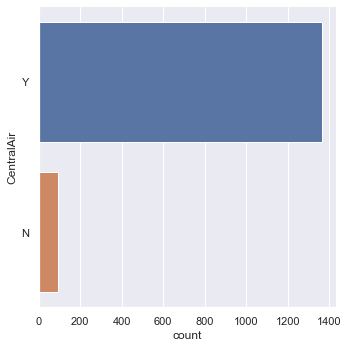

In [5]:
sb.catplot(y = "CentralAir", data = housedata, kind = "count")

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

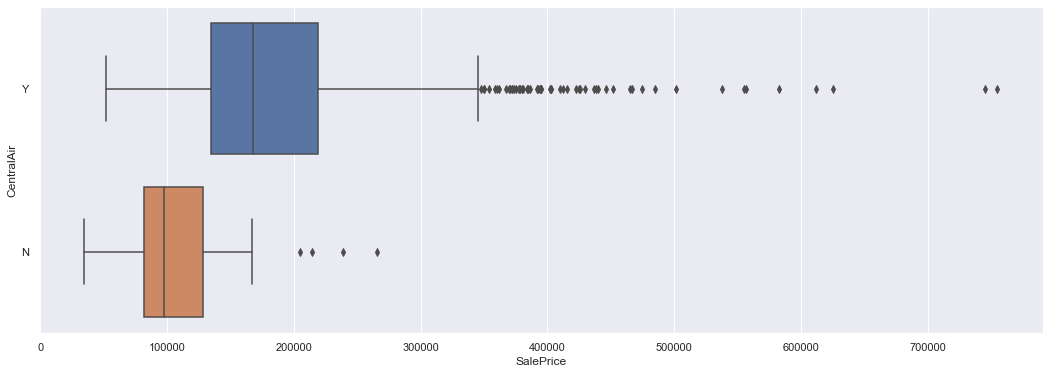

In [6]:
trainDF = pd.concat([centralair, saleprice], axis = 1).reindex(centralair.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

C:\Users\ghost\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

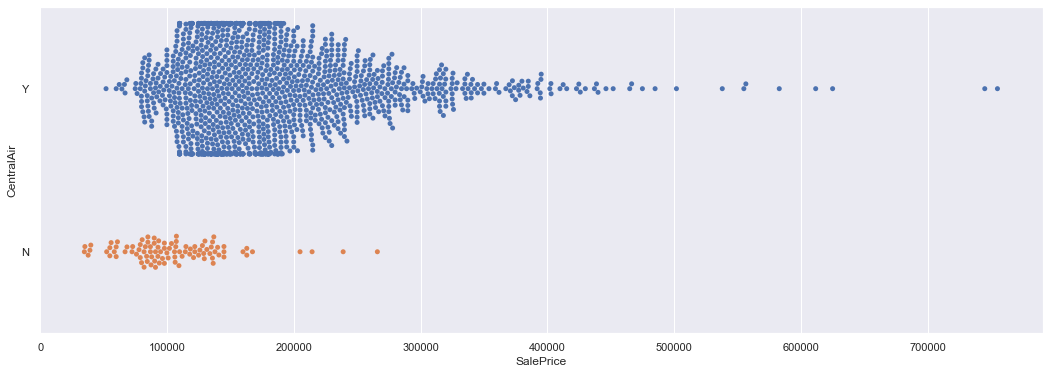

In [7]:
trainDF = pd.concat([centralair, saleprice], axis = 1).reindex(centralair.index)

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

In [8]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth = 2)

In [9]:
SalePrice_train = pd.DataFrame(saleprice[:1100])
centralair_train = pd.DataFrame(centralair[:1100])
SalePrice_test = pd.DataFrame(saleprice[-360:])
centralair_test = pd.DataFrame(centralair[-360:])
print("Train Set :", SalePrice_train.shape, centralair_train.shape)
print("Test Set  :", SalePrice_test.shape, centralair_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [10]:
y_train = pd.DataFrame(centralair_train['CentralAir'])
X_train = pd.DataFrame(SalePrice_train['SalePrice'])

In [12]:
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

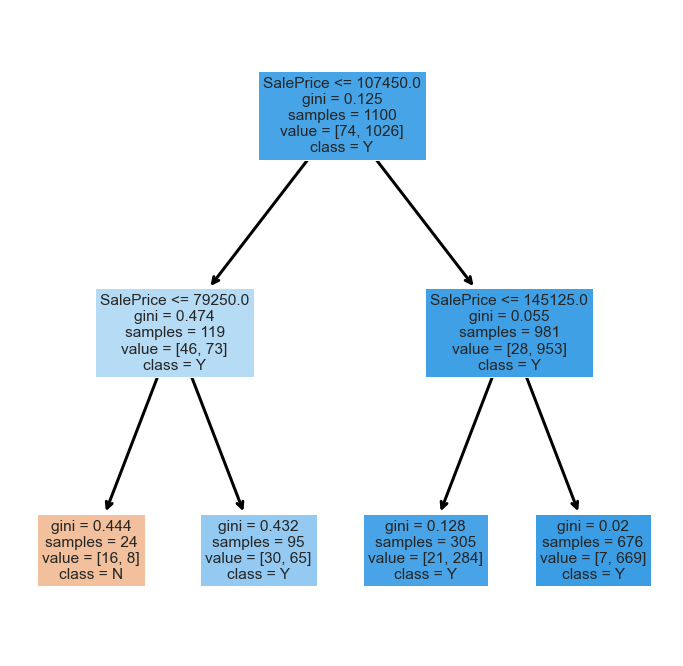

In [13]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.94


<AxesSubplot:>

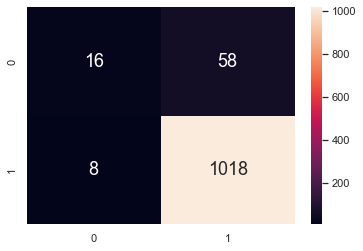

In [29]:
legnd_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9472222222222222


<AxesSubplot:>

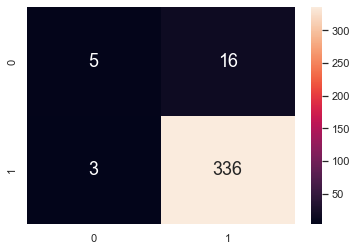

In [31]:
legnd_train_pred = dectree.predict(SalePrice_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(SalePrice_test, centralair_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralair_test, legnd_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9470319634703196

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9232876712328767



<AxesSubplot:>

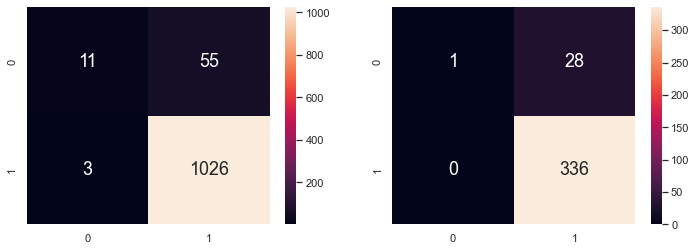

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(housedata['CentralAir'])   # Response
total = pd.DataFrame(housedata[['GrLivArea', 'LotArea', 'TotalBsmtSF']])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

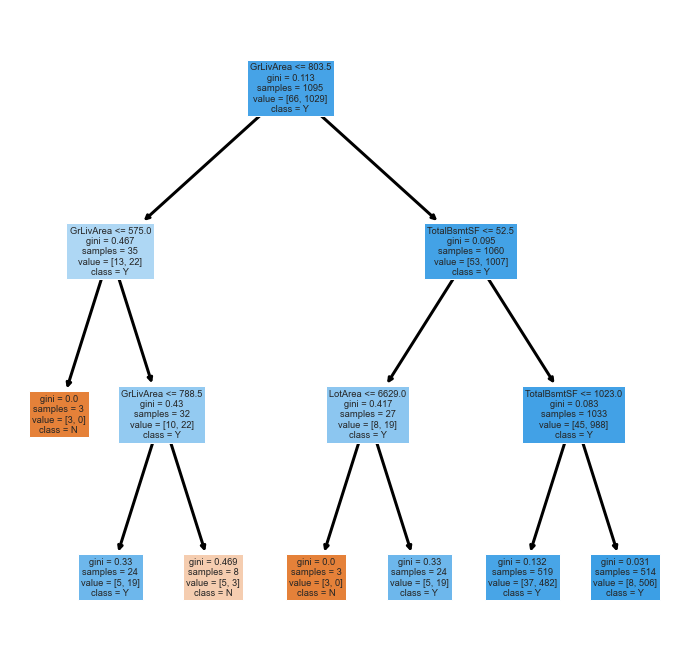

In [34]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()